# Práctica 06: Agrupamiento general
## Profesor: Daniel Jiménez Alcantar
## Alumno: Israel Daniel Arturo Cano Portugal
## Fecha: 15/11/2025

##**Introducción**

En el análisis moderno de datos, una de las tareas más comunes es descubrir patrones o estructuras ocultas cuando no se dispone de una variable respuesta que guíe el aprendizaje. Este escenario corresponde al aprendizaje no supervisado, cuyo objetivo es agrupar observaciones que comparten características similares sin utilizar etiquetas previas. Una técnica ampliamente empleada para lograrlo es el algoritmo k-means, que minimiza la suma de errores cuadráticos (SSE) y utiliza la distancia euclídea como medida de similitud para formar conglomerados.

En esta práctica se generó un conjunto de datos bidimensional mediante la función make_blobs, con el fin de evaluar el comportamiento del algoritmo k-means al variar el número de clusters. Se emplearon dos criterios cuantitativos para seleccionar el valor óptimo de k: el método del codo (SSE) y el índice de silueta. Con base en estos indicadores se eligió la partición final, se visualizaron los grupos detectados, se calcularon sus centroides y se analizó la distribución de tamaños. El trabajo permite ilustrar los conceptos de cohesión interna, separación externa y las ventajas o limitaciones inherentes al agrupamiento no supervisado.

## **Problematica**
Relaizar un agrupamiento general con un conjunto simulado de make blobs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Generar dataset BIDIMENSIONAL con make_blobs
SEED = 58
X, y_real = make_blobs(n_samples=600,centers=5,cluster_std=1.4,center_box=(-10, 10),random_state=SEED)

# añadir un poco de ruido para que no sea trivial
X += np.random.RandomState(SEED).normal(0, 0.2, X.shape)

In [ ]:
# Data
df = pd.DataFrame(X, columns=['x', 'y'])
df['cluster_real'] = y_real

Tras haber hecho la descarga y agregarle ruido dentro de una distribucion normal para que fuera mas variado consideramos hacer un analisis de como quedaron los datos generados considerando que fueran 5 centroides

## **EDA**

In [ ]:
# Analisis exploratorio
print("First 5 rows of the dataframe:")
display(df.head())

print("\nInformation about the dataframe:")
df.info()

print("\nDescriptive statistics of the dataframe:")
display(df.describe())

First 5 rows of the dataframe:


,x,y,cluster_real
0,3.054470,-7.039433,2
1,-0.816992,-8.472535,1
2,5.439875,10.537147,4
3,1.894272,-8.966108,1
4,5.567834,9.346073,4



Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x             600 non-null    float64
 1   y             600 non-null    float64
 2   cluster_real  600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB

Descriptive statistics of the dataframe:


,x,y,cluster_real
count,600.000000,600.000000,600.000000
mean,0.164790,-1.444871,2.000000
std,3.868334,6.084260,1.415394
min,-7.033365,-12.242992,0.000000
25%,-2.973162,-5.133683,1.000000
50%,-0.417934,-2.605131,2.000000
75%,2.598800,0.146460,3.000000
max,9.403935,12.375619,4.000000


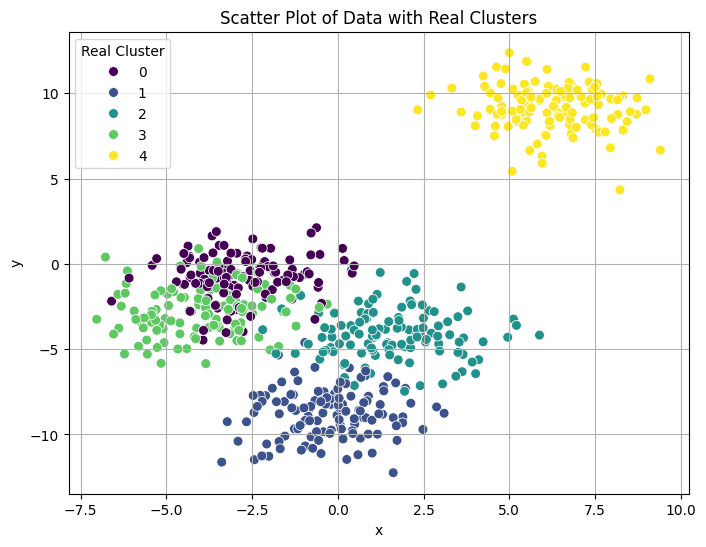

In [ ]:
# Scatter plot de Make_Blob_
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x', y='y', hue='cluster_real', palette='viridis', s=50)
plt.title('Scatter Plot of Data with Real Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Real Cluster')
plt.grid(True)
plt.show()

En este caso vemos como se generaron con dos aglomeraciones uno en donde se ve concentrado entre $x_!=(-7, 5)$, $y_1=(-12.5, 2.5)$ y otro grupo en $x_2=(2.2, 8.5)$, $y_2=(4.5, 14)$

Aunque nuestro make blob diga que son 5 centroides parecen ver solo dos clases

## **Agrupación de datos basada en medidas de distancia o similitud.**

Se eligió k-means porque el dataset es bidimensional, numérico y de tamaño moderado (600 instancias), condiciones en las que el algoritmo demuestra velocidad y escalabilidad al minimizar la suma de errores cuadráticos (SSE). Su supuesto de conglomerados esféricos y varianza homogénea coincide con la estructura generada por make_blobs, lo que garantiza resultados teóricamente coherentes.

In [ ]:
# Determinar k con codo y silueta
sse, sil = [], []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=SEED, n_init='auto')
    labels = km.fit_predict(X)
    sse.append(km.inertia_)
    sil.append(silhouette_score(X, labels))

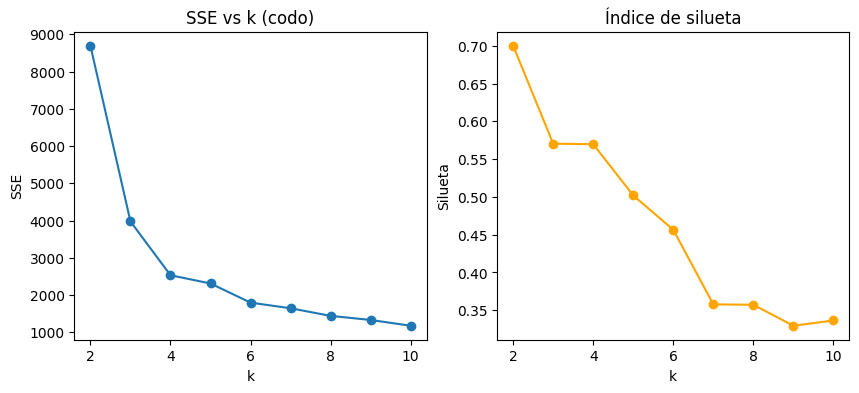

In [ ]:
# Gráficas
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(k_range, sse, '-o'); ax[0].set_title('SSE vs k (codo)')
ax[0].set_xlabel('k'); ax[0].set_ylabel('SSE')
ax[1].plot(k_range, sil, '-o', color='orange'); ax[1].set_title('Índice de silueta')
ax[1].set_xlabel('k'); ax[1].set_ylabel('Silueta')
plt.show()

In [ ]:
# k óptimo (mejor silueta)
k_opt = k_range[np.argmax(sil)]
print(f'k seleccionado (mejor silueta): {k_opt}')

k seleccionado (mejor silueta): 2


Para determinar el número de clusters se evaluaron dos criterios:

- El método del codo muestra una reducción gradual en la SSE, sin un punto de inflexión claro. La curva sugiere posibles particiones entre k = 3 y k = 4.
- El índice de silueta alcanza su máximo valor (0.70) en k = 2, indicando mayor cohesión interna y mejor separación entre grupos para esta configuración.

Se selecciona k = 2 por maximizar la calidad promedio del agrupamiento según la silueta.

In [ ]:
# Modelo final
km_final = KMeans(n_clusters=k_opt, random_state=SEED, n_init='auto')
labels_final = km_final.fit_predict(X)
centroids = km_final.cluster_centers_

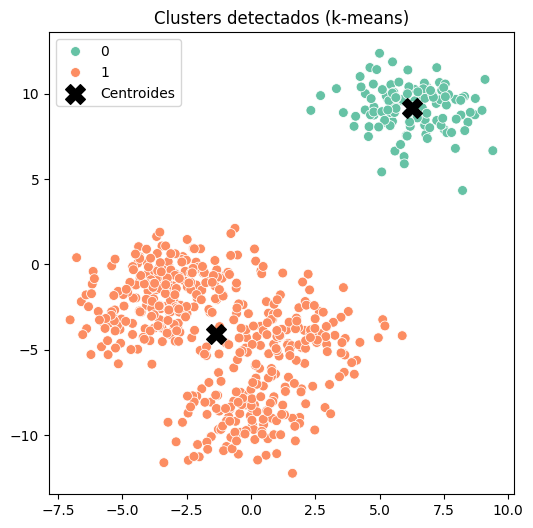

In [ ]:
# Visualización
plt.figure(figsize=(6,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_final, palette='Set2', s=50)
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='X', s=200, label='Centroides')
plt.title('Clusters detectados (k-means)')
plt.legend()
plt.show()

In [ ]:
# 8. Tabla resumen
summary = (pd.Series(labels_final).value_counts().sort_index().rename('Tamaño').to_frame())
summary['Centroide x'] = centroids[:,0]
summary['Centroide y'] = centroids[:,1]
summary['SSE parcial'] = [((X[labels_final==c] - centroids[c])**2).sum() for c in range(k_opt)]
summary.loc['TOTAL'] = summary.sum(numeric_only=True)
summary

,Tamaño,Centroide x,Centroide y,SSE parcial
0,120.0,6.242572,9.170616,427.081282
1,480.0,-1.354655,-4.098743,8266.071822
TOTAL,600.0,4.887916,5.071873,8693.153104


Se seleccionó k = 2 por maximizar el índice de silueta (0.70). El modelo produce dos grupos: uno pequeño y compacto (cluster 0), otro grande y disperso (cluster 1). La distancia entre centroides es significativa, indicando separación externa. La elección refleja prioridad por la métrica de calidad global (silueta) sobre la minimización de error interno (SSE).

## **Conclusiones:**
* ¿Qué es el aprendizaje no supervisado?

Conjunto de técnicas que identifican estructuras en datos sin variable objetivo.
En esta práctica, k-means agrupó 600 puntos bidimensionales sin conocimiento previo del número o composición de grupos.

---

* ¿Qué significa agrupar datos?

Consiste en particionar un conjunto de observaciones de modo que:
* Las dentro de un mismo grupo sean muy parecidas (alta similitud / baja distancia).
* Las de grupos distintos sean diferentes (baja similitud / alta distancia).

En esta práctica la similitud se midió con la distancia Euclídea; k-means minimiza el SSE (suma de esas distancias al cuadrado).

---

* ¿Explica la diferencia entre cohesión interna y separación externa?

| Concepto | ¿Qué mide? | Cómo se refleja en k-means |
|-|-|-|
| **Cohesión interna**   | Qué tan **compacto** es cada cluster | SSE **dentro** de cada grupo; cuanto **menor**, mejor cohesión. <br> En nuestro caso: <br> - Cluster 0: SSE = 427.1 (muy compacto) <br> - Cluster 1: SSE = 8266.1 (más disperso) |
| **Separación externa** | Qué tan **alejados** están los clusters entre sí | Distancia **entre centroides**; cuanto **mayor**, mejor separación. <br> Distancia entre nuestros centroides ≈ 14.3 unidades (buena separación). |

---

* ¿Por qué el número de clusters no siempre es evidente?

1. Solapamiento natural: los blobs se mezclan (en nuestro gráfico hay puntos frontera).

2. Métricas contradictorias:
   * El codo sugiere k = 3 ó 4 (caída suave después).
   * La silueta se maximiza en k = 2 (0.70).
3. Subjetividad del analista: depende del contexto del negocio; a veces k = 2 es interpretable (ej. “mercado alcista vs bajista”).

Por eso se grafican múltiples k y se usan varios criterios (codo, silueta, contexto).

---
* ¿Qué ventajas y desventajas presenta el agrupamiento?

| Ventajas                                                     | Desventajas                                                                                            |
| ------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------ |
| Descubre **estructura oculta** sin necesidad de etiquetas. | El **número de clusters** hay que especificar o inferir (no único).                                  |
| **Rápido y escalable** (k-means: O(n·k·d·i)).              | Asume **formas convexas** y **tamaños similares**; falla con blobs alargados o de densidad variable. |
| **Fácil de interpretar**: centroides y tamaños.            | **Outliers** distorsionan centroides y SSE (cluster 1 tiene 4× más puntos y 19× más SSE).            |
| Permite **segmentación** (marketing, riesgo, etc.).        | Resultado puede variar con **inicialización aleatoria** (aunque usamos `random_state=42`).           |
